In [ ]:
###libraries

In [67]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV

### loading data based on question

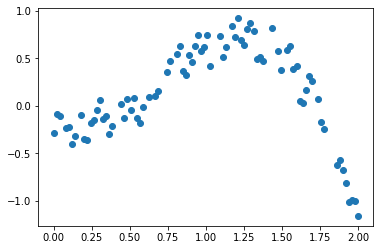

In [68]:

x =  np.linspace(0,2,100)
er = np.random.random_sample(size = 100)/2 - 0.5
y = np.sin(x**2) + er
#partition
X_trn, X_tst, Y_trn, Y_tst = train_test_split(x[:], y[:], test_size=0.2, random_state=150)
#graph
plt.scatter(X_trn,Y_trn)
plt.show()

##7-a


In [77]:
M = []
# linear kernel
M = np.append(M, GridSearchCV(SVR(kernel="linear",), param_grid={"C": [1e0, 1e1, 1e2, 1e3], 'gamma': np.logspace(-2, 2, 4)},))
# polynominal(d=3) kernel
M = np.append(M, GridSearchCV(SVR(kernel="poly",), param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": [1,.1]},))
# RBF kernel
M = np.append(M, GridSearchCV(SVR(kernel="rbf",), param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 4)},))
for i in M:
  i.fit(X_trn.reshape(-1,1), Y_trn)
print("best values of gamma and C for the kernel Linear are :{},".format(M[0].best_params_))
print(f"linear kernel R2 score: {M[0].best_score_:.3f})")

print("best values of gamma and C for the kernel Polynominal(d=3) are :{},".format(M[1].best_params_))
print(f"Polynominal(d=3) kernel R2 score: {M[1].best_score_:.3f})")

print("best values of gamma and C for the kernel RBF are :{},".format(M[2].best_params_))
print(f"RBF kernel R2 score: {M[2].best_score_:.3f})")



best values of gamma and C for the kernel Linear are :{'C': 1.0, 'gamma': 0.01},
linear kernel R2 score: -0.254)
best values of gamma and C for the kernel Polynominal(d=3) are :{'C': 1.0, 'gamma': 0.1},
Polynominal(d=3) kernel R2 score: -0.076)
best values of gamma and C for the kernel RBF are :{'C': 100.0, 'gamma': 100.0},
RBF kernel R2 score: 0.911)


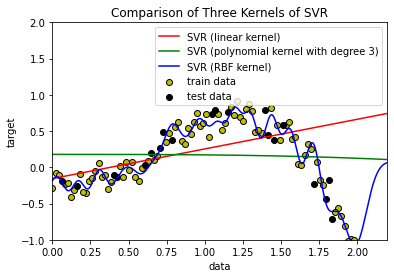

In [80]:
# an axis to be partitioned between different models
X_r = np.linspace(0, 5, 100000)[:, None]
#partition
y_linear = M[0].predict(X_r)
y_poly = M[1].predict(X_r)
y_rbf = M[2].predict(X_r)

#plotting data(test,train)
plt.scatter(X_trn.reshape(-1,1), Y_trn, c="y", label="train data", zorder=1, edgecolors=(0, 0, 0))
plt.scatter(X_tst.reshape(-1,1), Y_tst, c="k", label="test data", zorder=1, edgecolors=(0, 0, 0))
#plott diff models
plt.plot(X_r, y_linear, c="r", label="SVR (linear kernel)",)
plt.plot(X_r, y_poly, c="g", label="SVR (polynomial kernel with degree 3)",)
plt.plot( X_r, y_rbf, c="b",label="SVR (RBF kernel)",)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Comparison of Three Kernels of SVR")

plt.xlim(0,2.2)
plt.ylim(-1,2)

plt.legend()

plt.show()